In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import pandas as pd
import plotly.express as ply
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels import tsa
import numpy as np
import statistics
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import folium
import os
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
pd.set_option('display.max_rows',20000, 'display.max_columns',100)
import datetime as datetime
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [3]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from math import  sqrt
from sklearn.metrics import mean_squared_error

In [4]:
from pmdarima import auto_arima

In [5]:
df=pd.read_csv('covid_19_india.csv')

In [72]:
df.head()

,Sno,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
Date,,,,,,,,
2020-01-30,1,6:00 PM,Kerala,1,0,0,0,1
2020-01-31,2,6:00 PM,Kerala,1,0,0,0,1
2020-02-01,3,6:00 PM,Kerala,2,0,0,0,2
2020-02-02,4,6:00 PM,Kerala,3,0,0,0,3
2020-02-03,5,6:00 PM,Kerala,3,0,0,0,3


In [71]:
df.tail()

,Sno,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
Date,,,,,,,,
2021-06-28,16522,8:00 AM,Telangana,-,-,602676,3635,620613
2021-06-28,16523,8:00 AM,Tripura,-,-,60694,672,64863
2021-06-28,16524,8:00 AM,Uttarakhand,-,-,330066,7088,339619
2021-06-28,16525,8:00 AM,Uttar Pradesh,-,-,1679913,22518,1705596
2021-06-28,16526,8:00 AM,West Bengal,-,-,1455453,17612,1494949


In [7]:
df.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [9]:
df['State/UnionTerritory'].unique()

array(['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
       'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
       'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
       'Tripura', 'Nagaland', 'Meghalaya',
       'Dadra and Nagar Haveli and Daman and Diu',
       'Cases being reassigned to states', 'Sikkim', 'Daman & Diu',
       'Lakshadweep', 'Telangana', 'Dadra and Nagar Haveli', 'Bihar****'],
      dtype=object)

In [92]:
df.groupby(['State/UnionTerritory']).count()

,Sno,Time,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
State/UnionTerritory,,,,,,,
Andaman and Nicobar Islands,460,460,460,460,460,460,460
Andhra Pradesh,474,474,474,474,474,474,474
Arunachal Pradesh,452,452,452,452,452,452,452
Assam,454,454,454,454,454,454,454
Bihar,462,462,462,462,462,462,462
Bihar****,2,2,2,2,2,2,2
Cases being reassigned to states,60,60,60,60,60,60,60
Chandigarh,467,467,467,467,467,467,467
Chhattisgarh,467,467,467,467,467,467,467


In [8]:
import datetime

In [9]:
df['Date']=pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [10]:
df.set_index('Date',inplace=True)

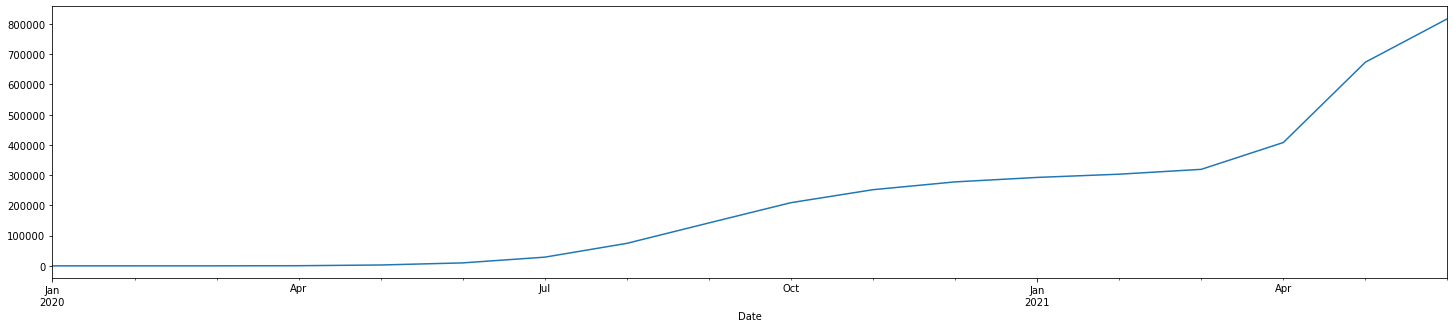

In [11]:
df['Confirmed'].resample(rule='M').mean().plot(figsize=(25,5))

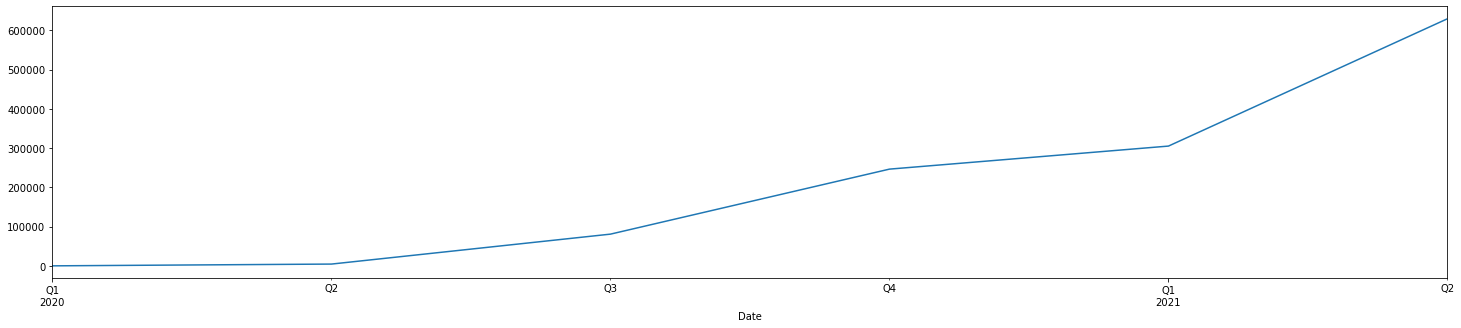

In [12]:
df['Confirmed'].resample(rule='Q').mean().plot(figsize=(25,5))

In [13]:
df1=pd.DataFrame()
df1=df.drop(columns=['Sno','Time','ConfirmedIndianNational','State/UnionTerritory','ConfirmedForeignNational','Cured','Deaths'])

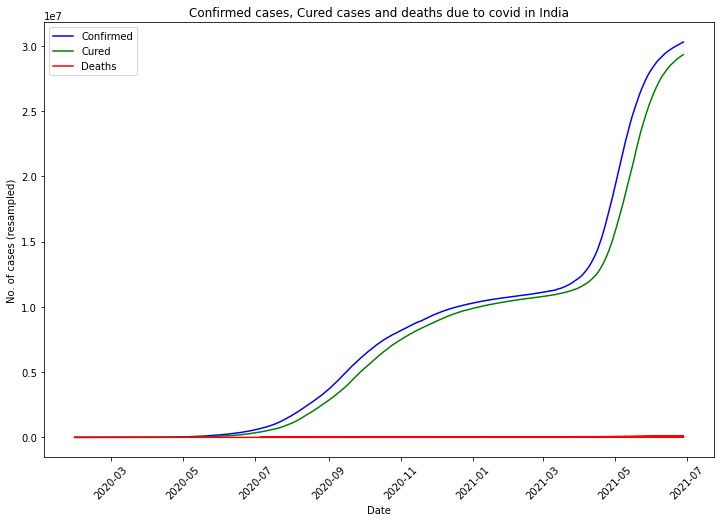

In [69]:
fig = plt.figure(figsize=(12, 8))
plt.plot(df_day['Confirmed'],color='blue')
plt.plot(df['Cured'].resample('D').sum(),color='green')
plt.plot(df['Deaths'],color='red')
plt.legend(['Confirmed','Cured','Deaths'])
plt.xlabel('Date')
plt.ylabel('No. of cases (resampled)')
plt.xticks(rotation=45)
plt.title('Confirmed cases, Cured cases and deaths due to covid in India')
plt.show()

In [14]:
df_day=df1.resample('D').sum()

In [15]:
df2=pd.DataFrame()
df2=df.drop(columns=['Sno','Time','ConfirmedIndianNational','State/UnionTerritory','ConfirmedForeignNational'])


In [104]:
df2=df2.resample('D').sum()

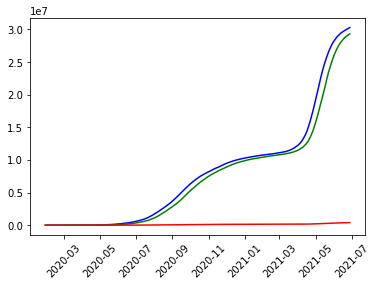

In [105]:
plt.plot(df2['Confirmed'],color='blue')
plt.plot(df2['Cured'],color='green')
plt.plot(df2['Deaths'],color='red')
plt.xticks(rotation=45)
plt.show()

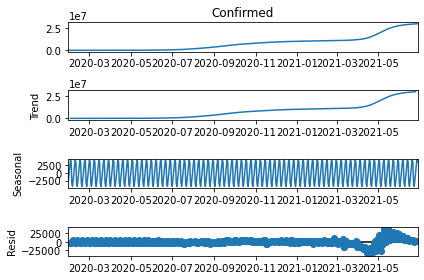

In [106]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df_day['Confirmed'])
result.plot()
plt.show()

In [20]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    #rolmean = pd.Rolling.mean(timeseries, window=24)
    rolmean = timeseries.rolling(12).mean()
    #rolstd = pd.Rolling.std(timeseries, window=24)
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))

    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.xlabel('Date')
    plt.ylabel('Confirmed cases (resampled)')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
              dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

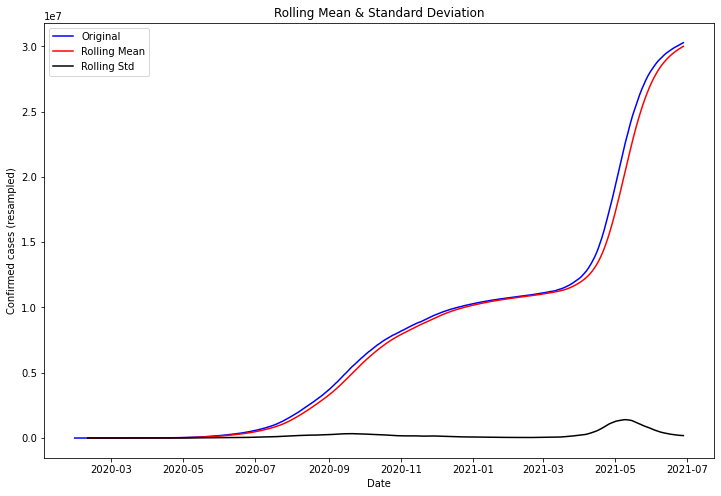

Test Statistic                   2.019209
p-value                          0.998697
#Lags Used                      17.000000
Number of Observations Used    498.000000
Critical Value (1%)             -3.443549
Critical Value (5%)             -2.867361
Critical Value (10%)            -2.569870
dtype: float64


In [21]:
test_stationarity(df_day['Confirmed'])

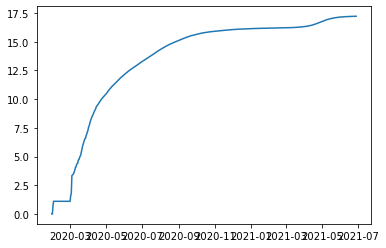

In [109]:
import numpy as np
log_df = np.log(df_day)
plt.plot(log_df)

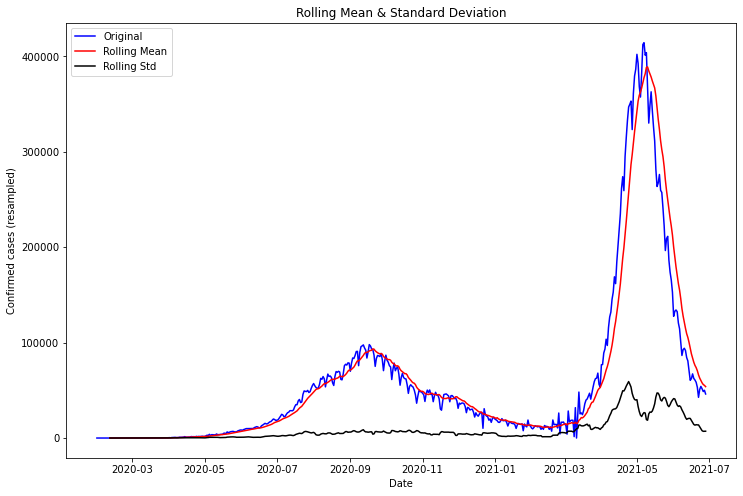

Test Statistic                  -3.016921
p-value                          0.033344
#Lags Used                      16.000000
Number of Observations Used    498.000000
Critical Value (1%)             -3.443549
Critical Value (5%)             -2.867361
Critical Value (10%)            -2.569870
dtype: float64


In [22]:
df_day['diff1']=df_day['Confirmed']-df_day['Confirmed'].shift(1)
test_stationarity(df_day['diff1'].dropna())

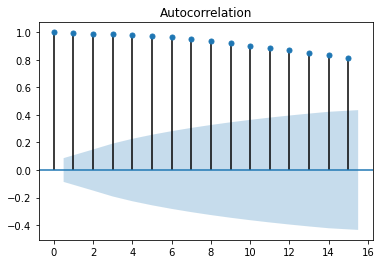

In [70]:
plot_acf(df_day['diff1'].dropna(),lags=15)
plt.show()

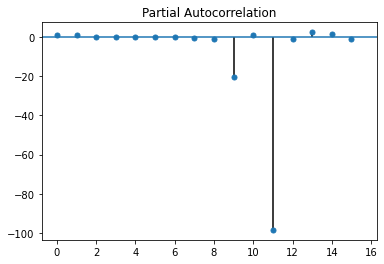

In [71]:
plot_pacf(df_day['diff1'].dropna(),lags=15)
plt.show()

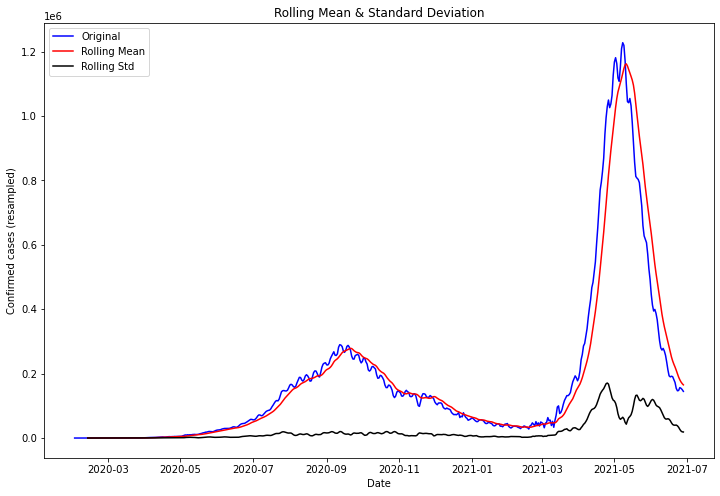

Test Statistic                  -2.294756
p-value                          0.173665
#Lags Used                      18.000000
Number of Observations Used    494.000000
Critical Value (1%)             -3.443657
Critical Value (5%)             -2.867408
Critical Value (10%)            -2.569896
dtype: float64


In [23]:
df_day['diff3']=df_day['Confirmed']-df_day['Confirmed'].shift(3)
test_stationarity(df_day['diff3'].dropna())

In [24]:
from statsmodels.tsa.arima.model import ARIMA

In [25]:
auto_arima_model=auto_arima(df_day['diff3'].dropna(),trace=True,Supress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.08 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=11289.622, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=10881.876, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=11034.561, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=11287.810, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=10865.404, Time=0.10 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=10856.609, Time=0.15 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=10723.622, Time=0.24 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=10655.453, Time=0.29 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=10610.284, Time=0.99 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=10633.868, Time=0.99 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=10616.112, Time=1.08 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.86 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=10608.260, Time=0.85 sec
 ARIMA(4,1,1)(0,0,0)[0]        

In [26]:
#Best Model 
arima_model_202 = ARIMA(df_day['Confirmed'].dropna(), order=(5,1,1)).fit()

In [75]:
arima_model_202.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Confirmed   No. Observations:                  516
Model:                 ARIMA(1, 2, 2)   Log Likelihood               -5333.764
Date:                Tue, 06 Jul 2021   AIC                          10675.527
Time:                        13:09:47   BIC                          10692.496
Sample:                    01-30-2020   HQIC                         10682.178
                         - 06-28-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9619      0.011     84.041      0.000       0.939       0.984
ma.L1         -1.0204      0.020    -50.455      0.000      -1.060      -0.981
ma.L2          0.1403      0.022      6.253      0.000       0.096       0.184
sigma2      6.591e+07   5.69e-11   1.16e+18      0.000    6.59e+07    6.59e+07
===================================================================================
Ljung-Box (Q):                      922.21   Jarque-Bera (JB):              1090.55
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):             331.34   Skew:                            -0.75
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.01e+33. Standard errors may be unstable.
"""

In [27]:
start = df_day.index.get_loc('2020-10-6')
end = df_day.index.get_loc('2021-06-28')
print(start,'to',end)

250 to 515


In [28]:
df_day.tail()

,Confirmed,diff1,diff3
Date,,,
2021-06-24,30082778,54069.0,147557.0
2021-06-25,30134445,51667.0,156584.0
2021-06-26,30183143,48698.0,154434.0
2021-06-27,30233183,50040.0,150405.0
2021-06-28,30279331,46148.0,144886.0


In [29]:
 predict_1= arima_model_202.predict(start=start+1 ,end=end+1, dynamic= False) 

In [30]:
#Trying to forecast future values
pred_future_10101=arima_model_202.predict(start=len(df_day)+1,end=len(df_day)+120,dynamic=False)
print("The length of pred_future values :",len(pred_future_10101))

The length of pred_future values : 120


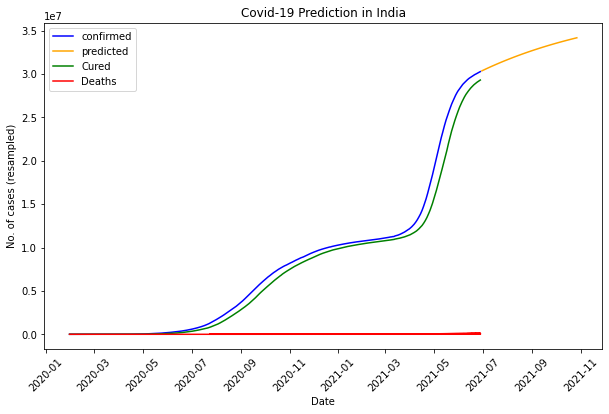

In [70]:
fig = plt.figure(figsize=(10, 6))
plt.plot(df_day['Confirmed'],color='blue')
#plt.plot(predict_1,color='yellow')
plt.plot(pred_future_10101,color='orange')
plt.plot(df['Cured'].resample('D').sum(),color='green')
plt.plot(df['Deaths'],color='red')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('No. of cases (resampled)')
plt.title('Covid-19 Prediction in India')
plt.legend(['confirmed','predicted','Cured','Deaths'])
plt.show()

Statewise prediction

In [32]:
df2=df.drop(columns=['Sno','Time','ConfirmedIndianNational','ConfirmedForeignNational','Cured','Deaths'])

Kerala

In [33]:
df_kr=df2[df2['State/UnionTerritory']=='Kerala']
df_kr.head()

,State/UnionTerritory,Confirmed
Date,,
2020-01-30,Kerala,1
2020-01-31,Kerala,1
2020-02-01,Kerala,2
2020-02-02,Kerala,3
2020-02-03,Kerala,3


In [21]:
df_kr.tail()

,State/UnionTerritory,Confirmed
Date,,
2021-06-24,Kerala,2842247
2021-06-25,Kerala,2854325
2021-06-26,Kerala,2865871
2021-06-27,Kerala,2877989
2021-06-28,Kerala,2888894


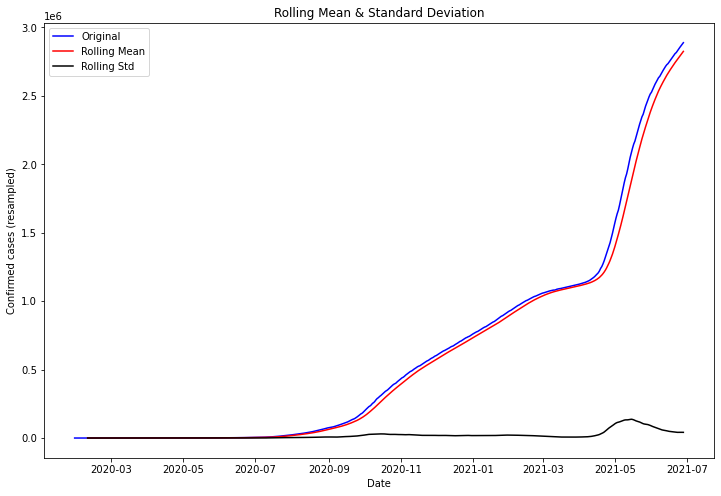

Test Statistic                   3.563378
p-value                          1.000000
#Lags Used                      18.000000
Number of Observations Used    497.000000
Critical Value (1%)             -3.443576
Critical Value (5%)             -2.867373
Critical Value (10%)            -2.569877
dtype: float64


In [34]:
df_kr=df_kr.resample('D').sum()
test_stationarity(df_kr['Confirmed'])

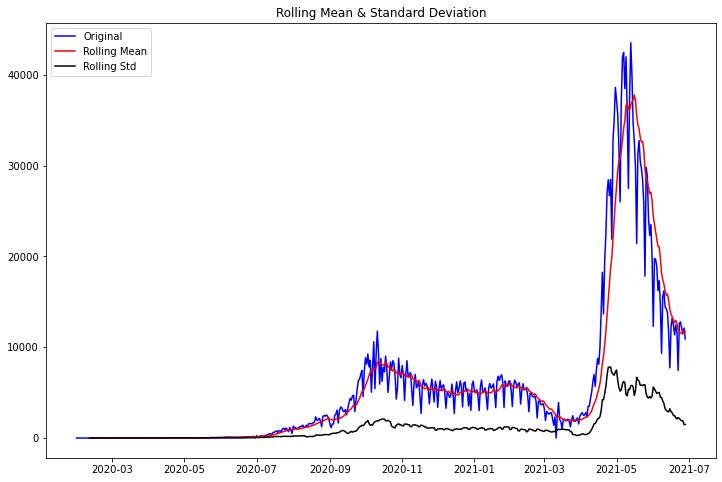

Test Statistic                  -3.088470
p-value                          0.027418
#Lags Used                      17.000000
Number of Observations Used    497.000000
Critical Value (1%)             -3.443576
Critical Value (5%)             -2.867373
Critical Value (10%)            -2.569877
dtype: float64


In [23]:
df_kr['diff1']=df_kr['Confirmed']-df_kr['Confirmed'].shift(1)
test_stationarity(df_kr['diff1'].dropna())

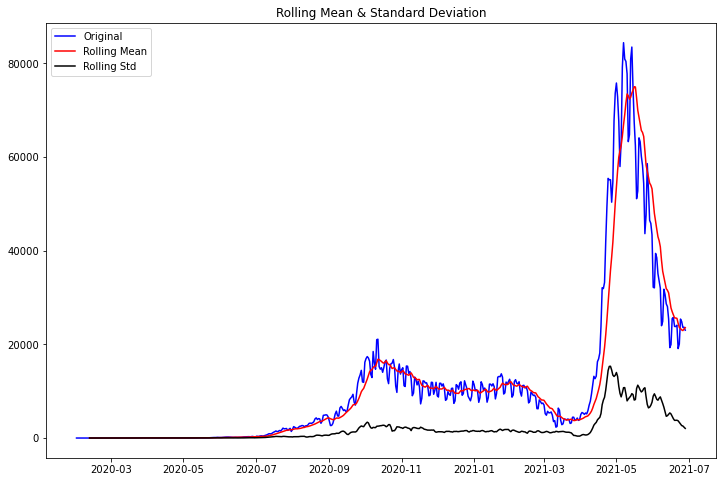

Test Statistic                  -2.581039
p-value                          0.096980
#Lags Used                      19.000000
Number of Observations Used    494.000000
Critical Value (1%)             -3.443657
Critical Value (5%)             -2.867408
Critical Value (10%)            -2.569896
dtype: float64


In [24]:
df_kr['diff2']=df_kr['Confirmed']-df_kr['Confirmed'].shift(2)
test_stationarity(df_kr['diff2'].dropna())

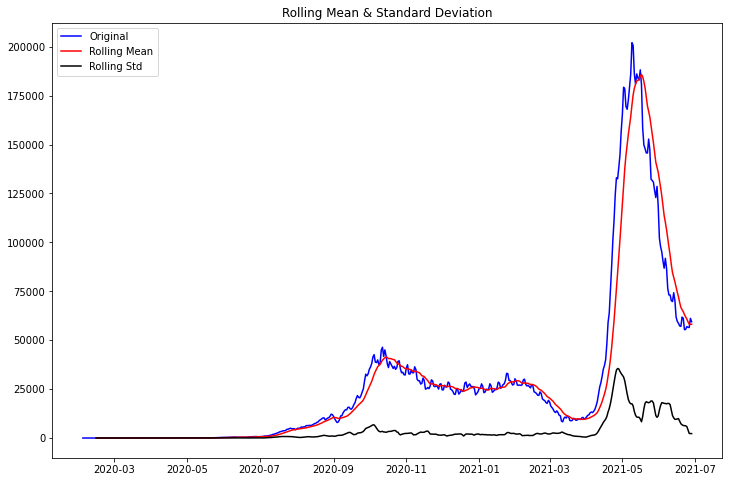

Test Statistic                  -2.088150
p-value                          0.249306
#Lags Used                      19.000000
Number of Observations Used    491.000000
Critical Value (1%)             -3.443739
Critical Value (5%)             -2.867444
Critical Value (10%)            -2.569915
dtype: float64


In [35]:
df_kr['diff3']=df_kr['Confirmed']-df_kr['Confirmed'].shift(3)
test_stationarity(df_kr['diff3'].dropna())

In [39]:
auto_arima_model1=auto_arima(df_kr['diff3'].dropna(),trace=True,Supress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=9217.245, Time=0.52 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=9529.108, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=9405.303, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=9411.822, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=9527.441, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=9242.325, Time=0.50 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=9354.158, Time=0.39 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=9217.271, Time=0.30 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=9212.569, Time=1.24 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=9183.099, Time=1.35 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=9275.165, Time=0.37 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=9200.973, Time=2.04 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=1.17 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=i

The length of pred_future values : 150


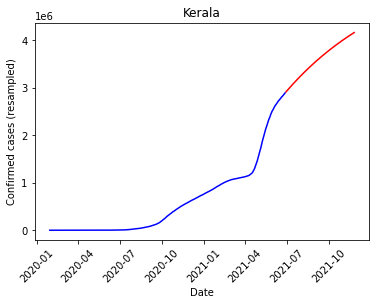

In [36]:
arima_model_424 = ARIMA(df_kr['Confirmed'].dropna(), order=(1,1,3)).fit()
start = df_day.index.get_loc('2020-01-30')
end = df_day.index.get_loc('2021-06-28')
predict2= arima_model_424.predict(start=start+1 ,end=end+1, dynamic= False)
pred_future=arima_model_424.predict(start=len(df_kr)+1,end=len(df_kr)+(150),dynamic=False)
print("The length of pred_future values :",len(pred_future))
plt.plot(df_kr['Confirmed'],color='blue')
#plt.plot(predict2,color='yellow')
plt.plot(pred_future,color='red')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Confirmed cases (resampled)')
plt.title('Kerala')
plt.show()

Maharashtra

In [37]:
df_mh=df2[df2['State/UnionTerritory']=='Maharashtra']
df_mh.head()

,State/UnionTerritory,Confirmed
Date,,
2020-03-09,Maharashtra,2
2020-03-10,Maharashtra,5
2020-03-11,Maharashtra,2
2020-03-12,Maharashtra,11
2020-03-13,Maharashtra,14


In [43]:
df_mh.tail()

,State/UnionTerritory,Confirmed
Date,,
2021-06-24,Maharashtra,5997587
2021-06-25,Maharashtra,6007431
2021-06-26,Maharashtra,6017035
2021-06-27,Maharashtra,6026847
2021-06-28,Maharashtra,6036821


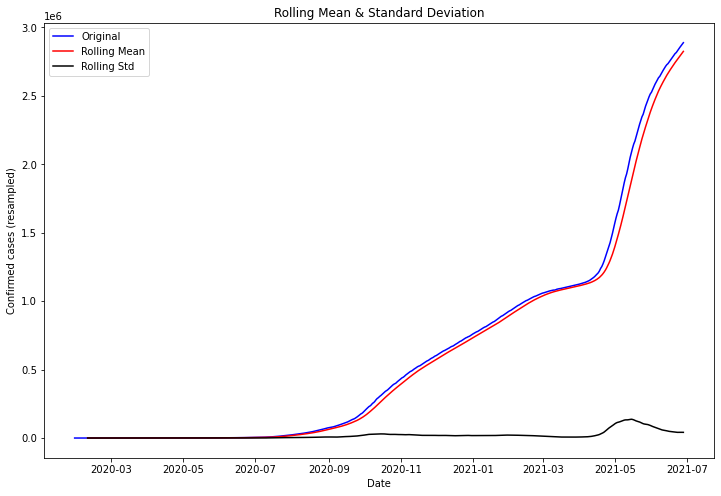

Test Statistic                   3.563378
p-value                          1.000000
#Lags Used                      18.000000
Number of Observations Used    497.000000
Critical Value (1%)             -3.443576
Critical Value (5%)             -2.867373
Critical Value (10%)            -2.569877
dtype: float64


In [39]:
df_mh=df_kr.resample('D').sum()
test_stationarity(df_mh['Confirmed'])

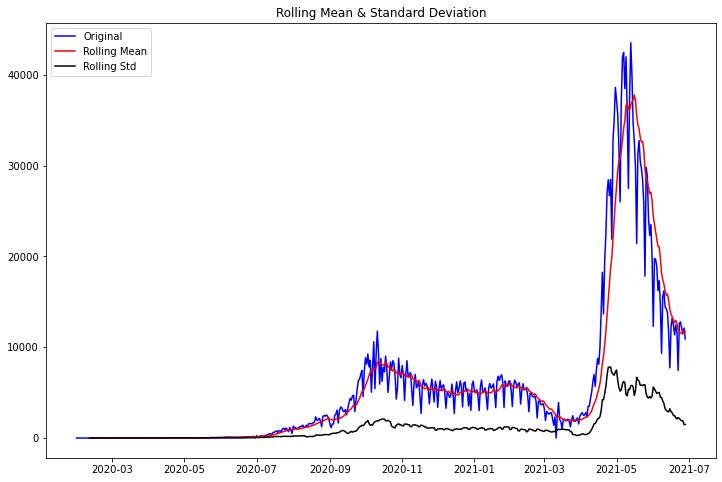

Test Statistic                  -3.088470
p-value                          0.027418
#Lags Used                      17.000000
Number of Observations Used    497.000000
Critical Value (1%)             -3.443576
Critical Value (5%)             -2.867373
Critical Value (10%)            -2.569877
dtype: float64


In [47]:
df_mh['diff1']=df_mh['Confirmed']-df_mh['Confirmed'].shift(1)
test_stationarity(df_mh['diff1'].dropna())

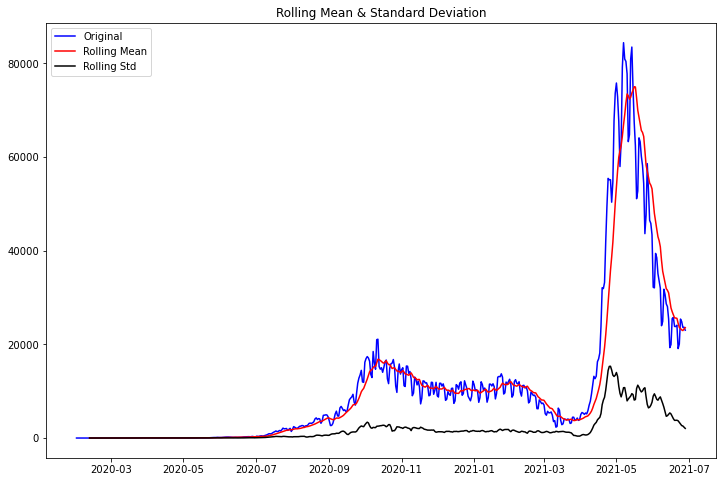

Test Statistic                  -2.581039
p-value                          0.096980
#Lags Used                      19.000000
Number of Observations Used    494.000000
Critical Value (1%)             -3.443657
Critical Value (5%)             -2.867408
Critical Value (10%)            -2.569896
dtype: float64


In [48]:
df_mh['diff2']=df_mh['Confirmed']-df_mh['Confirmed'].shift(2)
test_stationarity(df_mh['diff2'].dropna())

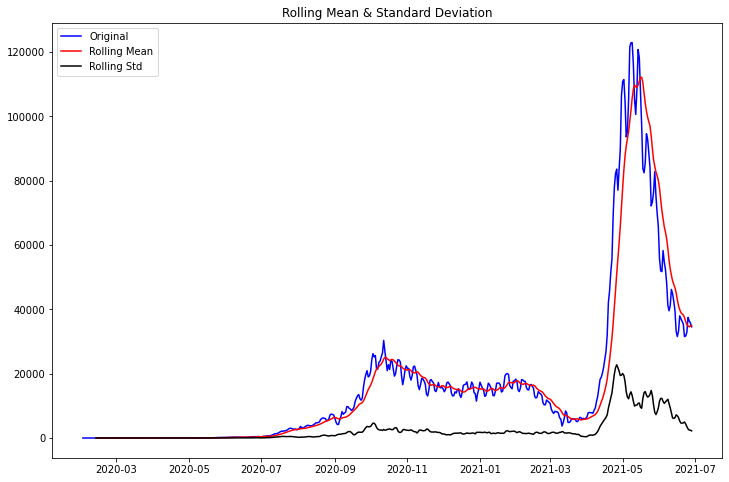

Test Statistic                  -2.650243
p-value                          0.083051
#Lags Used                      19.000000
Number of Observations Used    493.000000
Critical Value (1%)             -3.443684
Critical Value (5%)             -2.867420
Critical Value (10%)            -2.569902
dtype: float64


In [52]:
df_mh['diff3']=df_mh['Confirmed']-df_mh['Confirmed'].shift(3)
test_stationarity(df_mh['diff3'].dropna())

In [53]:
auto_arima_model1=auto_arima(df_mh['diff3'].dropna(),trace=True,Supress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=9217.245, Time=0.53 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=9529.108, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=9405.303, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=9411.822, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=9527.441, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=9242.325, Time=0.51 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=9354.158, Time=0.41 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=9217.271, Time=0.78 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=9212.569, Time=1.58 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=9183.099, Time=1.47 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=9275.165, Time=0.36 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=9200.973, Time=1.90 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.70 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=i

The length of pred_future values : 150


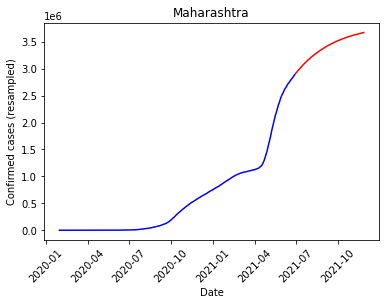

In [41]:
arima_model_424 = ARIMA(df_mh['Confirmed'].dropna(), order=(5,1,4)).fit()
start = df_day.index.get_loc('2020-03-09')
end = df_day.index.get_loc('2021-06-28')
predict2= arima_model_424.predict(start=start+1 ,end=end+1, dynamic= False)
pred_future=arima_model_424.predict(start=len(df_mh)+1,end=len(df_mh)+(150),dynamic=False)
print("The length of pred_future values :",len(pred_future))
plt.plot(df_mh['Confirmed'],color='blue')
#plt.plot(predict2,color='yellow')
plt.plot(pred_future,color='red')
plt.xlabel('Date')
plt.ylabel('Confirmed cases (resampled)')
plt.title('Maharashtra')
plt.xticks(rotation=45)
plt.show()

Odisha

In [42]:
df_od=df2[df2['State/UnionTerritory']=='Odisha']
df_od.head()

,State/UnionTerritory,Confirmed
Date,,
2020-03-16,Odisha,1
2020-03-17,Odisha,1
2020-03-18,Odisha,1
2020-03-19,Odisha,1
2020-03-20,Odisha,2


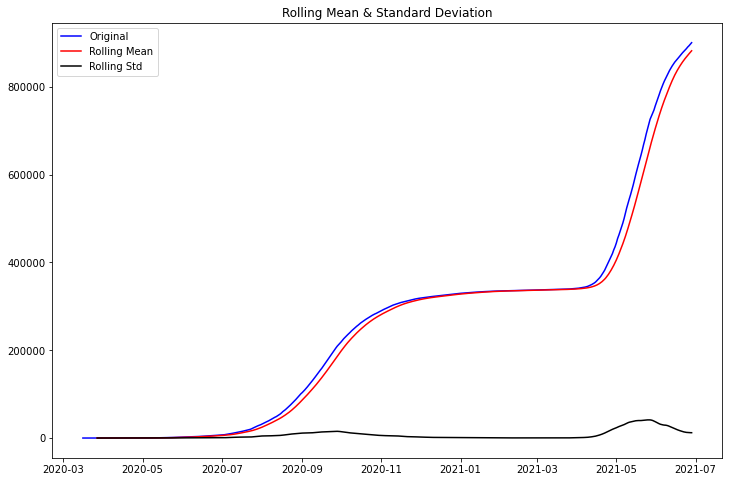

Test Statistic                   1.796621
p-value                          0.998342
#Lags Used                      17.000000
Number of Observations Used    452.000000
Critical Value (1%)             -3.444900
Critical Value (5%)             -2.867956
Critical Value (10%)            -2.570187
dtype: float64


In [57]:
df_od=df_od.resample('D').sum()
test_stationarity(df_od['Confirmed'])

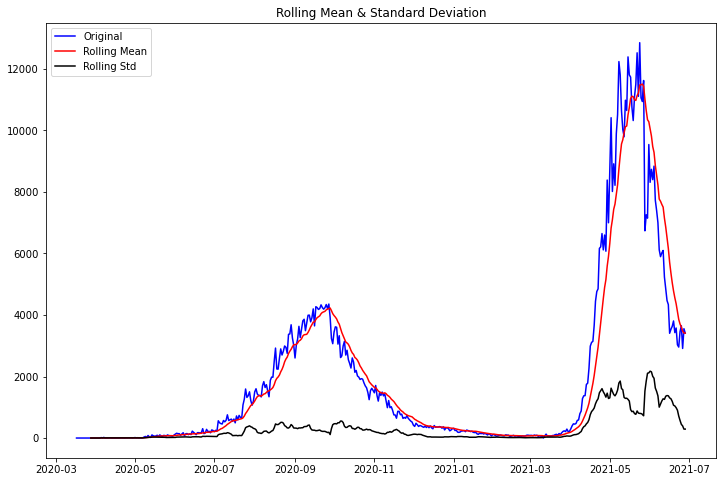

Test Statistic                  -3.110839
p-value                          0.025761
#Lags Used                      14.000000
Number of Observations Used    454.000000
Critical Value (1%)             -3.444836
Critical Value (5%)             -2.867927
Critical Value (10%)            -2.570172
dtype: float64


In [59]:
df_od['diff1']=df_od['Confirmed']-df_od['Confirmed'].shift(1)
test_stationarity(df_od['diff1'].dropna())

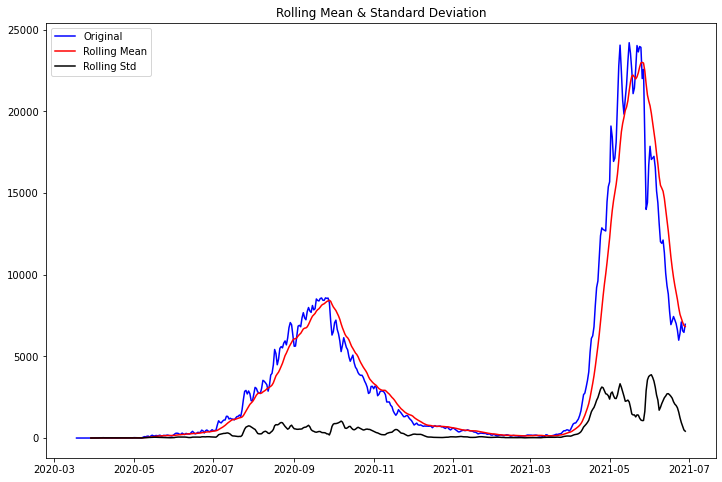

Test Statistic                  -3.622934
p-value                          0.005337
#Lags Used                      17.000000
Number of Observations Used    450.000000
Critical Value (1%)             -3.444966
Critical Value (5%)             -2.867984
Critical Value (10%)            -2.570203
dtype: float64


In [63]:
df_od['diff2']=df_od['Confirmed']-df_od['Confirmed'].shift(2)
test_stationarity(df_od['diff2'].dropna())

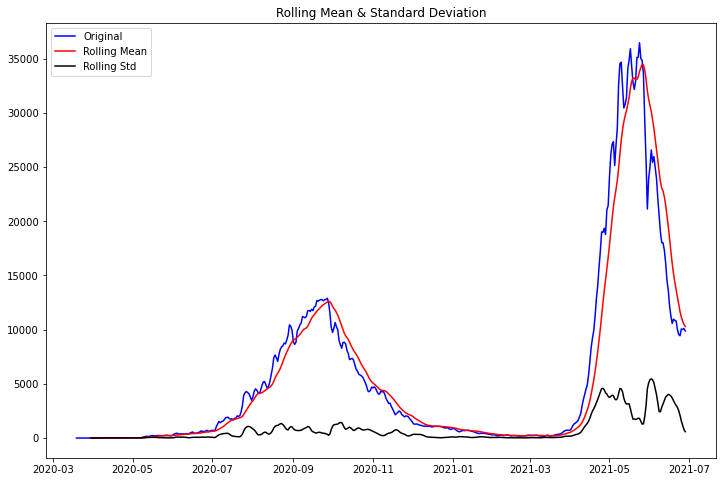

Test Statistic                  -3.611901
p-value                          0.005538
#Lags Used                      18.000000
Number of Observations Used    448.000000
Critical Value (1%)             -3.445031
Critical Value (5%)             -2.868013
Critical Value (10%)            -2.570218
dtype: float64


In [66]:
df_od['diff3']=df_od['Confirmed']-df_od['Confirmed'].shift(3)
test_stationarity(df_od['diff3'].dropna())

In [68]:
auto_arima_model1=auto_arima(df_od['diff3'].dropna(),trace=True,Supress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.10 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=7393.351, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=7268.646, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=7316.307, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=7391.815, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=7267.482, Time=0.04 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=7177.752, Time=0.06 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=7153.259, Time=0.08 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=7109.391, Time=0.10 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=7067.892, Time=0.89 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=7106.700, Time=1.59 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.86 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.01 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=7066.012, Time=0.57 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=7104.5

The length of pred_future values : 150


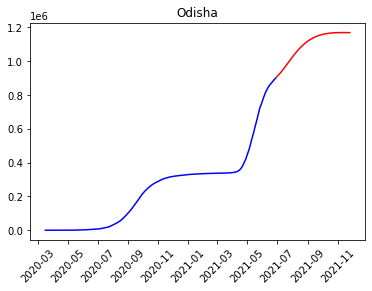

In [90]:
arima_model_424 = ARIMA(df_od['Confirmed'].dropna(), order=(5,1,5)).fit()
start = df_day.index.get_loc('2020-03-16')
end = df_day.index.get_loc('2021-06-28')
predict2= arima_model_424.predict(start=start+1 ,end=end+1, dynamic= False)
pred_future=arima_model_424.predict(start=len(df_od)+1,end=len(df_od)+(150),dynamic=False)
print("The length of pred_future values :",len(pred_future))
plt.plot(df_od['Confirmed'],color='blue')
#plt.plot(predict2,color='yellow')
plt.plot(pred_future,color='red')
plt.xticks(rotation=45)
plt.title('Odisha')
plt.show()

Andhra Pradesh

In [43]:
df_ap=df2[df2['State/UnionTerritory']=='Andhra Pradesh']
df_ap.head()

,State/UnionTerritory,Confirmed
Date,,
2020-03-12,Andhra Pradesh,1
2020-03-13,Andhra Pradesh,1
2020-03-14,Andhra Pradesh,1
2020-03-15,Andhra Pradesh,1
2020-03-16,Andhra Pradesh,1


In [44]:
df_ap.tail()

,State/UnionTerritory,Confirmed
Date,,
2021-06-24,Andhra Pradesh,1862036
2021-06-25,Andhra Pradesh,1867017
2021-06-26,Andhra Pradesh,1871475
2021-06-27,Andhra Pradesh,1875622
2021-06-28,Andhra Pradesh,1879872


In [45]:
df_ap=df_ap.resample('D').sum()

In [79]:

df_ap['diff2']=df_ap['Confirmed']-df_ap['Confirmed'].shift(2)
auto_arima_model1=auto_arima(df_ap['diff2'].dropna(),trace=True,Supress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=7910.612, Time=0.75 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8102.807, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8078.852, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8100.895, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.60 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.74 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.13 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.55 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.62 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.97 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=7927.769, Time=0.28 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.08 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=7908.653, Time=0.43 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=inf, Time=0.52 sec
 ARIMA(2,1,1

The length of pred_future values : 150


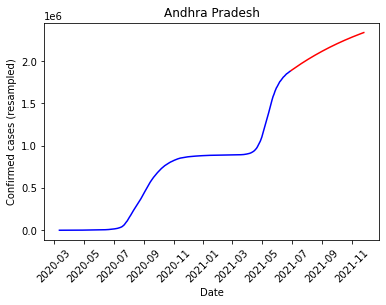

In [47]:
arima_model_424 = ARIMA(df_ap['Confirmed'].dropna(), order=(2,1,2)).fit()
start = df_day.index.get_loc('2020-03-12')
end = df_day.index.get_loc('2021-06-28')
predict2= arima_model_424.predict(start=start+1 ,end=end+1, dynamic= False)
pred_future=arima_model_424.predict(start=len(df_ap)+1,end=len(df_ap)+(150),dynamic=False)
print("The length of pred_future values :",len(pred_future))
plt.plot(df_ap['Confirmed'],color='blue')
#plt.plot(predict2,color='yellow')
plt.title('Andhra Pradesh')
plt.plot(pred_future,color='red')
plt.xlabel('Date')
plt.ylabel('Confirmed cases (resampled)')
plt.xticks(rotation=45)
plt.show()

Uttar Pradesh

In [48]:
df_up=df2[df2['State/UnionTerritory']=='Uttar Pradesh']
df_up.head()

,State/UnionTerritory,Confirmed
Date,,
2020-03-04,Uttar Pradesh,6
2020-03-05,Uttar Pradesh,7
2020-03-06,Uttar Pradesh,7
2020-03-07,Uttar Pradesh,7
2020-03-08,Uttar Pradesh,7


In [82]:
df_up.tail()

,State/UnionTerritory,Confirmed
Date,,
2021-06-24,Uttar Pradesh,1704790
2021-06-25,Uttar Pradesh,1705014
2021-06-26,Uttar Pradesh,1705220
2021-06-27,Uttar Pradesh,1705384
2021-06-28,Uttar Pradesh,1705596


In [49]:
df_up=df_up.resample('D').sum()

In [150]:

df_up['diff2']=df_up['Confirmed']-df_up['Confirmed'].shift(5)
auto_arima_model1=auto_arima(df_up['diff2'].dropna(),trace=True,Supress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=8151.055, Time=1.56 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8784.555, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8270.628, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8556.659, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8782.556, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=8167.240, Time=0.24 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=8168.724, Time=0.33 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.27 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=8165.655, Time=0.68 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=8175.457, Time=0.23 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=8171.672, Time=0.47 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=8168.693, Time=0.34 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=2.01 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=8149.055, Time=0.61 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=8

The length of pred_future values : 150


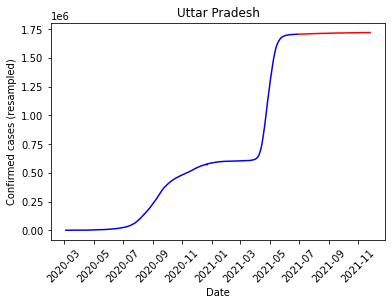

In [51]:
arima_model_424 = ARIMA(df_up['Confirmed'].dropna(), order=(2,1,2)).fit()
start = df_day.index.get_loc('2020-03-04')
end = df_day.index.get_loc('2021-06-28')
predict2= arima_model_424.predict(start=start+1 ,end=end+1, dynamic= False)
pred_future=arima_model_424.predict(start=len(df_up)+1,end=len(df_up)+(150),dynamic=False)
print("The length of pred_future values :",len(pred_future))
plt.plot(df_up['Confirmed'],color='blue')
#plt.plot(predict2,color='yellow')
plt.title('Uttar Pradesh')
plt.plot(pred_future,color='red')
plt.xlabel('Date')
plt.ylabel('Confirmed cases (resampled)')
plt.xticks(rotation=45)
plt.show()

Tamil Nadu

In [52]:
df_tn=df2[df2['State/UnionTerritory']=='Tamil Nadu']
df_tn.head()

,State/UnionTerritory,Confirmed
Date,,
2020-03-07,Tamil Nadu,1
2020-03-08,Tamil Nadu,1
2020-03-09,Tamil Nadu,1
2020-03-10,Tamil Nadu,1
2020-03-11,Tamil Nadu,1


In [28]:
df_tn.tail()

,State/UnionTerritory,Confirmed
Date,,
2021-06-24,Tamil Nadu,2443415
2021-06-25,Tamil Nadu,2449577
2021-06-26,Tamil Nadu,2455332
2021-06-27,Tamil Nadu,2460747
2021-06-28,Tamil Nadu,2465874


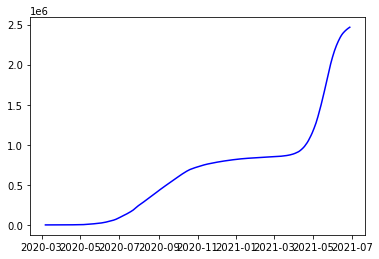

In [29]:
plt.plot(df_tn['Confirmed'],color='blue')

In [53]:
df_tn=df_tn.resample('D').sum()

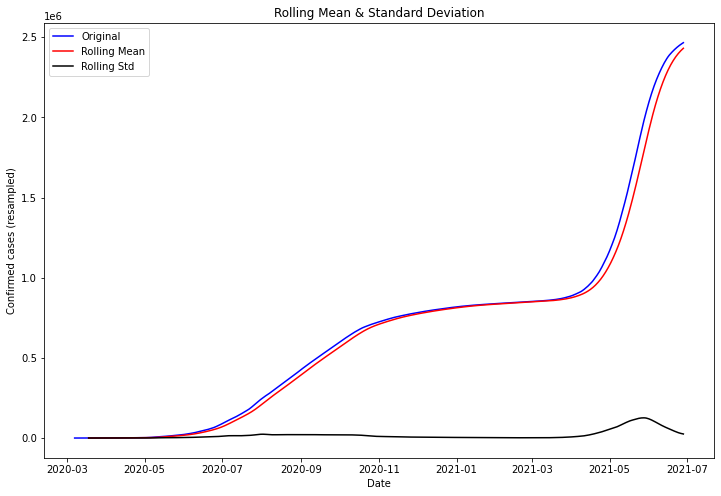

Test Statistic                   1.309377
p-value                          0.996661
#Lags Used                      18.000000
Number of Observations Used    460.000000
Critical Value (1%)             -3.444646
Critical Value (5%)             -2.867844
Critical Value (10%)            -2.570128
dtype: float64


In [62]:
test_stationarity(df_tn['Confirmed'])

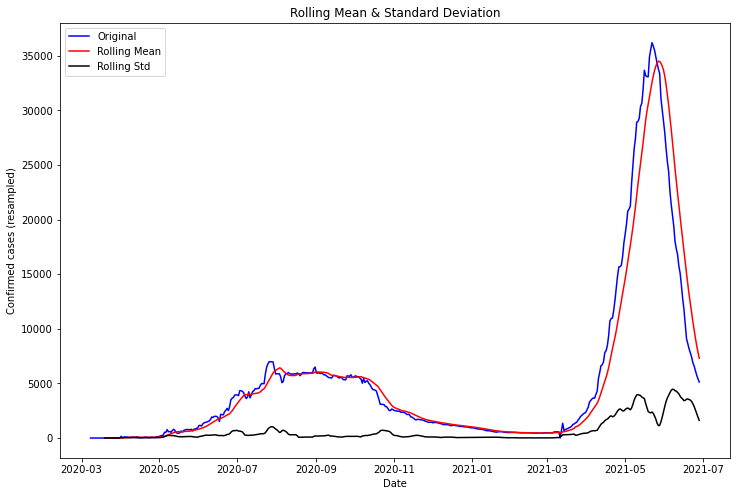

Test Statistic                  -2.392819
p-value                          0.143773
#Lags Used                      18.000000
Number of Observations Used    459.000000
Critical Value (1%)             -3.444677
Critical Value (5%)             -2.867857
Critical Value (10%)            -2.570135
dtype: float64


In [61]:
test_stationarity(df_tn['diff1'].dropna())

In [58]:

df_tn['diff1']=df_tn['Confirmed']-df_tn['Confirmed'].shift(1)
auto_arima_model1=auto_arima(df_tn['Confirmed'].dropna(),trace=True,Supress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=6744.334, Time=0.38 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=7112.269, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=6824.931, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=6940.203, Time=0.14 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=6744.022, Time=0.24 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=6890.532, Time=0.21 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=6747.276, Time=0.23 sec
 ARIMA(1,2,3)(0,0,0)[0]             : AIC=6740.323, Time=0.51 sec
 ARIMA(0,2,3)(0,0,0)[0]             : AIC=6863.106, Time=0.26 sec
 ARIMA(2,2,3)(0,0,0)[0]             : AIC=6723.492, Time=0.57 sec
 ARIMA(3,2,3)(0,0,0)[0]             : AIC=6741.541, Time=0.66 sec
 ARIMA(2,2,4)(0,0,0)[0]             : AIC=6730.909, Time=0.82 sec
 ARIMA(1,2,4)(0,0,0)[0]             : AIC=6731.043, Time=0.58 sec
 ARIMA(3,2,2)(0,0,0)[0]             : AIC=6727.233, Time=0.96 sec
 ARIMA(3,2,4)(0,0,0)[0]          

The length of pred_future values : 150


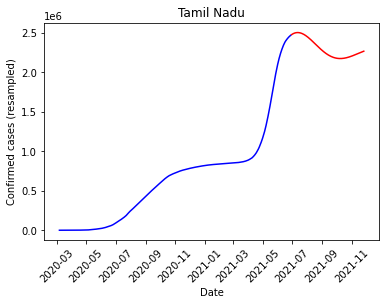

In [64]:
arima_model_424 = ARIMA(df_tn['Confirmed'].dropna(), order=(2,1,3)).fit()
start = df_tn.index.get_loc('2020-03-07')
end = df_tn.index.get_loc('2021-06-28')
predict2= arima_model_424.predict(start=start+1 ,end=end+1, dynamic= False)
pred_future=arima_model_424.predict(start=len(df_tn)+1,end=len(df_tn)+(150),dynamic=False)
print("The length of pred_future values :",len(pred_future))
plt.plot(df_tn['Confirmed'],color='blue')
#plt.plot(predict2,color='yellow')
plt.title('Tamil Nadu')
plt.plot(pred_future,color='red')
plt.xlabel('Date')
plt.ylabel('Confirmed cases (resampled)')
plt.xticks(rotation=45)
plt.show()

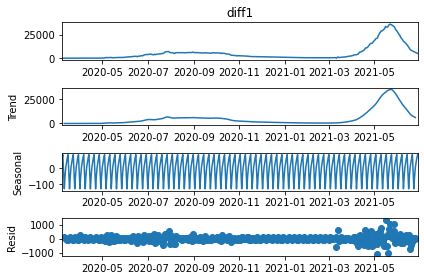

In [67]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df_tn['diff1'].dropna())
result.plot()
plt.show()

In [68]:
df_tn

,Confirmed,diff2,diff1
Date,,,
2020-03-07,1,NaN,NaN
2020-03-08,1,NaN,0.0
2020-03-09,1,0.0,0.0
2020-03-10,1,0.0,0.0
2020-03-11,1,0.0,0.0
2020-03-12,1,0.0,0.0
2020-03-13,1,0.0,0.0
2020-03-14,1,0.0,0.0
2020-03-15,1,0.0,0.0
